In [1]:
import numpy as np
import pandas as pd
import SAGEnet.plot
import SAGEnet.tools
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats
from plot_results import save_boxplots

#### load data

In [9]:
gtex_expr_data_path='/data/tuxm/GTEX_v8/Brain-Cortex_covariate_adjusted_log_tpm.csv'
gtex_expr_data = pd.read_csv(gtex_expr_data_path, index_col=0)
subs = ['-'.join(item.split('-')[:2]) for item in gtex_expr_data.columns] # remove tissue label to match vcf
gtex_expr_data.columns = subs

rosmap_expr_data_path='/data/mostafavilab/personal_genome_expr/data/rosmap/expressionData/vcf_match_covariate_adjusted_log_tpm.csv'
rosmap_expr_data = pd.read_csv(rosmap_expr_data_path, index_col=0)

predixcan_res_path='/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/results_data/predixcan/rosmap_pearson_corr.csv'
top_1000_gene_set = SAGEnet.tools.select_gene_set(predixcan_res_path, rand_genes=0,num_genes=1000,gene_idx_start=0) 
top_1000_gene_set=np.array([gene for gene in top_1000_gene_set if gene in gtex_expr_data.index])
top_1000_train, top_1000_val , top_1000_test = SAGEnet.tools.get_train_val_test_genes(top_1000_gene_set)

sub_data_dir='/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/input_data/individual_sets/'
rosmap_train_subs = np.loadtxt(f'{sub_data_dir}ROSMAP/train_subs.csv',delimiter=',',dtype=str)
rosmap_val_subs = np.loadtxt(f'{sub_data_dir}ROSMAP/val_subs.csv',delimiter=',',dtype=str)
rosmap_test_subs = np.loadtxt(f'{sub_data_dir}ROSMAP/test_subs.csv',delimiter=',',dtype=str)

selecting genes from 0 to 1000
selecting train/val/test gene sets based on chromosome split


#### performance compared to baselines

In [11]:
rosmap_predixcan_corr = pd.read_csv('/data/mostafavilab/personal_genome_expr/predixcan_res/rosmap/40k/MAF_0.01/pearson_corr.csv',index_col=0)
gtex_predixcan_corr = pd.read_csv('/data/mostafavilab/personal_genome_expr/predixcan_res/gtex/40k/MAF_0.01/pearson_corr_cortex.csv',index_col=0)

rosmap_enformer_corr = pd.read_csv('/data/mostafavilab/personal_genome_expr/final_results/enformer/rosmap/test_subs/per_gene_pearson_corr.csv',index_col=0)
gtex_enformer_corr = pd.read_csv('/data/mostafavilab/personal_genome_expr/final_results/enformer/gtex/per_gene_pearson_corr.csv',index_col=0)

rosmap_da_corr=pd.read_csv('/data/mostafavilab/personal_genome_expr/da_models/1k_with_rc_22962405/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/rosmap/test_subs/epoch=17.ckpt/per_gene_pearson_corr.csv',index_col=0)
gtex_da_corr=pd.read_csv('/data/mostafavilab/personal_genome_expr/da_models/1k_with_rc_22962405/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=17.ckpt/per_gene_pearson_corr.csv',index_col=0)

gtex_refcnn_corr=pd.read_csv('/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand/job0/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=12-step=32045.ckpt/per_gene_pearson_corr.csv',index_col=0)
rosmap_refcnn_corr=pd.read_csv('/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand/job0/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/rosmap/test_subs/epoch=12-step=32045.ckpt/per_gene_pearson_corr.csv',index_col=0)

In [10]:
custom_palette = {
    'Enformer \n ROSMAP': sb.color_palette('colorblind')[0],
    'Enformer \n GTEx': sb.color_palette('colorblind')[0],
    'r-SAGE-net \n ROSMAP': sb.color_palette('colorblind')[1],
    'r-SAGE-net \n GTEx': sb.color_palette('colorblind')[1],
    'p-SAGE-net \n ROSMAP': sb.color_palette('colorblind')[2],
    'p-SAGE-net \n GTEx': sb.color_palette('colorblind')[2],
    'PrediXcan \n ROSMAP': sb.color_palette('colorblind')[3],
    'PrediXcan \n GTEx': sb.color_palette('colorblind')[3],
}

<Figure size 432x288 with 0 Axes>

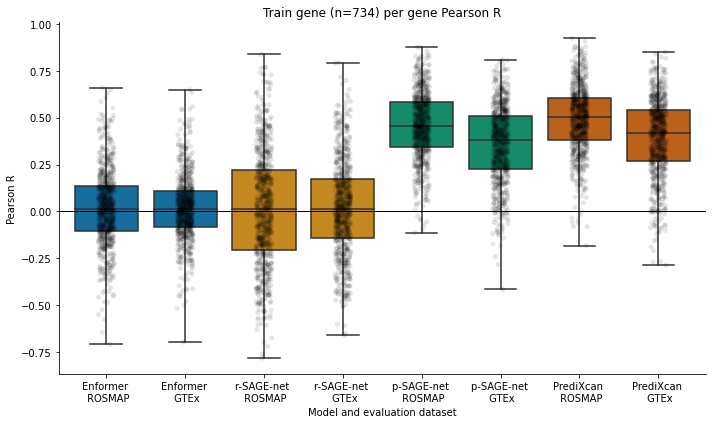

In [11]:
gene_set = top_1000_train

comb_res = pd.DataFrame(index=gene_set)
comb_res['Enformer \n ROSMAP'] = rosmap_enformer_corr.loc[gene_set]['pearson']
comb_res['Enformer \n GTEx'] = gtex_enformer_corr.loc[gene_set]['pearson']
comb_res['r-SAGE-net \n ROSMAP'] = rosmap_refcnn_corr.loc[gene_set]['pearson']
comb_res['r-SAGE-net \n GTEx'] = gtex_refcnn_corr.loc[gene_set]['pearson']
comb_res['p-SAGE-net \n ROSMAP'] = rosmap_da_corr.loc[gene_set]['pearson']
comb_res['p-SAGE-net \n GTEx'] = gtex_da_corr.loc[gene_set]['pearson']
comb_res['PrediXcan \n ROSMAP'] = rosmap_predixcan_corr.loc[gene_set]['test_pearson']
comb_res['PrediXcan \n GTEx'] = gtex_predixcan_corr.loc[gene_set]['pearson']

SAGEnet.plot.sb_boxplot(comb_res,custom_palette=custom_palette,fig_width=10,title=f'Train gene (n={len(comb_res)}) per gene Pearson R',xlabel='Model and evaluation dataset',ylabel='Pearson R')

<Figure size 432x288 with 0 Axes>

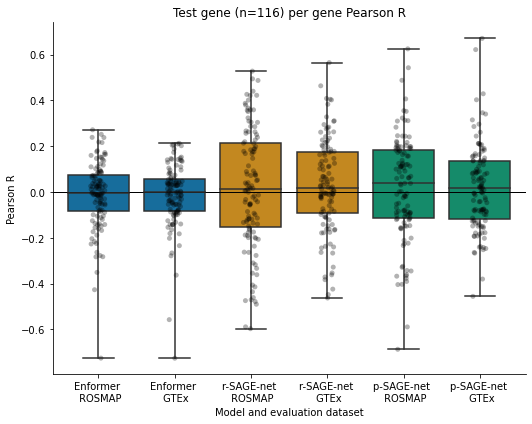

In [14]:
gene_set = top_1000_test

comb_res = pd.DataFrame(index=gene_set)
comb_res['Enformer \n ROSMAP'] = rosmap_enformer_corr.loc[gene_set]['pearson']
comb_res['Enformer \n GTEx'] = gtex_enformer_corr.loc[gene_set]['pearson']
comb_res['r-SAGE-net \n ROSMAP'] = rosmap_refcnn_corr.loc[gene_set]['pearson']
comb_res['r-SAGE-net \n GTEx'] = gtex_refcnn_corr.loc[gene_set]['pearson']
comb_res['p-SAGE-net \n ROSMAP'] = rosmap_da_corr.loc[gene_set]['pearson']
comb_res['p-SAGE-net \n GTEx'] = gtex_da_corr.loc[gene_set]['pearson']

SAGEnet.plot.sb_boxplot(comb_res,custom_palette=custom_palette,fig_width=7.5,title=f'Test gene (n={len(comb_res)}) per gene Pearson R',xlabel='Model and evaluation dataset',ylabel='Pearson R',dot_alpha=.3)

<Figure size 432x288 with 0 Axes>

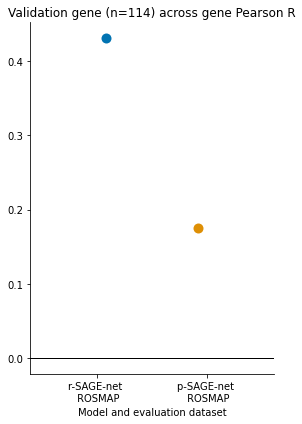

In [37]:
# top 1000 val across genes

gene_set=top_1000_val

rosmap_da_pred=pd.read_csv('/data/mostafavilab/personal_genome_expr/da_models/1k_with_rc_22962405/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/rosmap/test_subs/epoch=17.ckpt/mean_predictions.csv',index_col=0)
rosmap_refcnn_pred=pd.read_csv('/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand/job0/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/rosmap/test_subs/epoch=12-step=32045.ckpt/predictions.csv',index_col=0)

rosmap_da_corr, pval = scipy.stats.pearsonr(rosmap_da_pred.loc[gene_set][rosmap_test_subs].mean(axis=1),rosmap_expr_data.loc[gene_set][rosmap_train_subs].mean(axis=1).values)
rosmap_refcnn_corr, pval = scipy.stats.pearsonr(rosmap_refcnn_pred.loc[gene_set][rosmap_test_subs].mean(axis=1),rosmap_expr_data.loc[gene_set][rosmap_train_subs].mean(axis=1).values)

comb_res = pd.DataFrame(index=list(range(1)))
comb_res[f'r-SAGE-net \n ROSMAP']=rosmap_refcnn_corr
comb_res[f'p-SAGE-net \n ROSMAP']=rosmap_da_corr

SAGEnet.plot.sb_boxplot(comb_res,title=f'Validation gene (n={len(gene_set)}) across gene Pearson R',dot_size=10,dot_alpha=1,fig_width=4,boxplot=False,xlabel='Model and evaluation dataset')

#### training dynamics 

In [27]:
refcnn_pred_dir = '/data/mostafavilab/personal_genome_expr/ref_cnn_models/batch_norm/21890795/eval_on_ref_seq/'
refcnn_pred_gene_list = np.load(f'{refcnn_pred_dir}gene_list.npy')
refcnn_pred = np.load(f'{refcnn_pred_dir}epoch=16-step=15000.ckpt_preds.npy')
refcnn_pred_res= pd.DataFrame(index=refcnn_pred_gene_list)
refcnn_pred_res['pred'] = refcnn_pred
refcnn_corr, p = scipy.stats.pearsonr(refcnn_pred_res.loc[top_1000_val]['pred'],rosmap_expr_data.loc[top_1000_val][rosmap_train_subs].mean(axis=1).values)
refcnn_per_gene_pearson = pd.read_csv('/data/mostafavilab/personal_genome_expr/ref_cnn_models/batch_norm/21890795/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/rosmap/val_subs/epoch=16-step=15000.ckpt/per_gene_pearson_corr.csv',index_col=0)

In [29]:
train_gene_per_gene_corrs=np.load('/data/mostafavilab/personal_genome_expr/da_models/train_gene_per_gene_corrs.npy')
val_gene_per_gene_corrs=np.load('/data/mostafavilab/personal_genome_expr/da_models/val_gene_per_gene_corrs.npy')
val_gene_across_gene_corrs=np.load('/data/mostafavilab/personal_genome_expr/da_models/val_gene_across_gene_corrs.npy')

train_gene_per_gene_corrs=np.nanmedian(train_gene_per_gene_corrs,axis=2)
val_gene_per_gene_corrs=np.nanmedian(val_gene_per_gene_corrs,axis=2)
val_gene_across_gene_corrs=np.nanmedian(val_gene_across_gene_corrs,axis=2)

# add in refcnn vals 
ref_train_gene_per_gene_corr = np.full((train_gene_per_gene_corrs.shape[0],1), np.nanmedian(refcnn_per_gene_pearson.loc[top_1000_train]['pearson']))
train_gene_per_gene_corrs = np.hstack((ref_train_gene_per_gene_corr, train_gene_per_gene_corrs))

ref_val_gene_per_gene_corr = np.full((val_gene_per_gene_corrs.shape[0],1), np.nanmedian(refcnn_per_gene_pearson.loc[top_1000_val]['pearson']))
val_gene_per_gene_corrs = np.hstack((ref_val_gene_per_gene_corr, val_gene_per_gene_corrs))

ref_val_gene_across_gene_corr = np.full((val_gene_across_gene_corrs.shape[0],1), refcnn_corr)
val_gene_across_gene_corrs = np.hstack((ref_val_gene_across_gene_corr, val_gene_across_gene_corrs))

# don't use only personal 
train_gene_per_gene_corrs = np.delete(train_gene_per_gene_corrs, 4, axis=0)
val_gene_per_gene_corrs = np.delete(val_gene_per_gene_corrs, 4, axis=0)
val_gene_across_gene_corrs = np.delete(val_gene_across_gene_corrs, 4, axis=0)

In [32]:
val_gene_across_gene_corrs.shape

(6, 11)

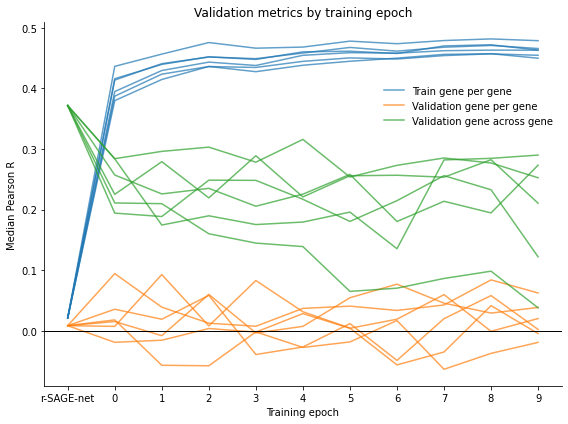

In [34]:
x = range(0, train_gene_per_gene_corrs.shape[1])
plt.figure(figsize=(8, 6))
for i in range(train_gene_per_gene_corrs.shape[0]):
    plt.plot(x, train_gene_per_gene_corrs[i], color='#1f77b4', alpha=0.7, label='Train gene per gene' if i == 0 else "")
for i in range(val_gene_per_gene_corrs.shape[0]):
    plt.plot(x, val_gene_per_gene_corrs[i], color='#ff7f0e', alpha=0.7, label='Validation gene per gene' if i == 0 else "")
for i in range(val_gene_across_gene_corrs.shape[0]):
    plt.plot(x, val_gene_across_gene_corrs[i], color='#2ca02c', alpha=0.7, label='Validation gene across gene' if i == 0 else "")
plt.xlabel('Training epoch')
plt.ylabel('Median Pearson R')
plt.title('Validation metrics by training epoch')
plt.legend(fontsize=10, bbox_to_anchor=(1, 0.85),frameon=False)
plt.axhline(y=0, color='black', linewidth=1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
xlablels = ['r-SAGE-net']
for i in range(10): 
    xlablels.append(i)
plt.xticks(ticks=x, labels=xlablels) 
plt.tight_layout()
plt.show()

#### vary MAF

selecting train/val/test gene sets based on chromosome split
selecting train/val/test gene sets based on chromosome split


<Figure size 432x288 with 0 Axes>

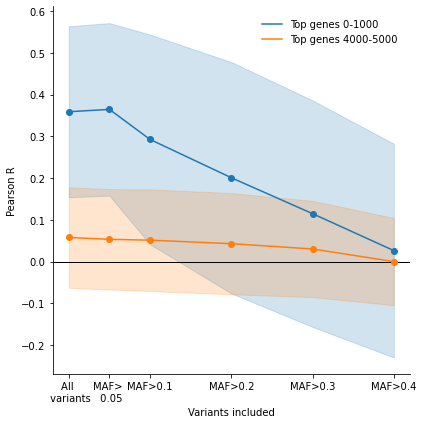

In [11]:
base_top_path_maf='/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/snps_and_indels/'
top_paths = [
'/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
f'{base_top_path_maf}maf_filter_0.05/gtex/test_subs/epoch=8.ckpt/',
f'{base_top_path_maf}maf_filter_0.1/gtex/test_subs/epoch=8.ckpt/',
f'{base_top_path_maf}maf_filter_0.2/gtex/test_subs/epoch=8.ckpt/',
f'{base_top_path_maf}maf_filter_0.3/gtex/test_subs/epoch=8.ckpt/',
f'{base_top_path_maf}maf_filter_0.4/gtex/test_subs/epoch=8.ckpt/',
]

base_harder_path_maf = '/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/23317290/personal_model/metric_train_gene_gene/eval_on_individual/snps_and_indels/'
harder_paths = [
'/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/23317290/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=9.ckpt/',
f'{base_harder_path_maf}maf_filter_0.05/gtex/test_subs/epoch=9.ckpt/',
f'{base_harder_path_maf}maf_filter_0.1/gtex/test_subs/epoch=9.ckpt/',
f'{base_harder_path_maf}maf_filter_0.2/gtex/test_subs/epoch=9.ckpt/',
f'{base_harder_path_maf}maf_filter_0.3/gtex/test_subs/epoch=9.ckpt/',
f'{base_harder_path_maf}maf_filter_0.4/gtex/test_subs/epoch=9.ckpt/',
]

top_gene_list = np.load(f'{top_paths[0]}gene_list.npy')
harder_gene_list = np.load(f'{harder_paths[1]}gene_list.npy')
top_train, top_val, top_test = SAGEnet.tools.get_train_val_test_genes(top_gene_list)
harder_train, harder_val, harder_test = SAGEnet.tools.get_train_val_test_genes(harder_gene_list)
labels = ['All \n variants','MAF> \n 0.05','MAF>0.1','MAF>0.2','MAF>0.3','MAF>0.4']
x = [0,0.05,.1,.2,.3,.4]

# train gene per gene 
top_gene_res = []
for path in top_paths: 
    top_gene_res.append(pd.read_csv(f'{path}per_gene_pearson_corr.csv',index_col=0).loc[top_train]['pearson'].values)
top_gene_res=np.array(top_gene_res)

harder_gene_res = []
for path in harder_paths: 
    harder_gene_res.append(pd.read_csv(f'{path}per_gene_pearson_corr.csv',index_col=0).loc[harder_train]['pearson'].values)
harder_gene_res=np.array(harder_gene_res)

SAGEnet.plot.line_plot_compare(top_gene_res,harder_gene_res,xlabels=labels,arra_t='Top genes 0-1000',arrb_t='Top genes 4000-5000',xlabel='Variants included',ylabel='Pearson R',fig_width=6,legend_x=.99,legend_y=.99,x=x)

#### n training individuals 

selecting train/val/test gene sets based on chromosome split
selecting train/val/test gene sets based on chromosome split


<Figure size 432x288 with 0 Axes>

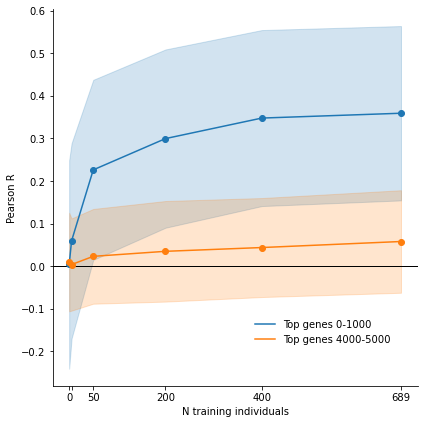

<Figure size 432x288 with 0 Axes>

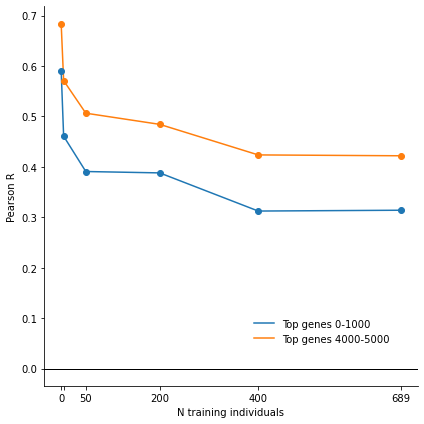

In [12]:
top_paths = [
'/data/mostafavilab/personal_genome_expr/ref_cnn_models/batch_norm/21890795/eval_on_individual/gtex/test/',
'/data/mostafavilab/personal_genome_expr/da_models/num_training_subs_save_all_epochs/22527971/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=4.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/num_training_subs_save_all_epochs/22527973/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=9.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/num_training_subs_save_all_epochs/22527975/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=7.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/num_training_subs_save_all_epochs/22527978/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=9.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/']

harder_paths = [
'/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand/job0/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=12-step=32045.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/22982304/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=5.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/22982305/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=6.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/22982306/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=8.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/22982307/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=9.ckpt/',
'/data/mostafavilab/personal_genome_expr/da_models/harder_num_training_subs_save_all_epochs/23317290/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=9.ckpt/']

top_gene_list = np.load(f'{top_paths[1]}gene_list.npy')
harder_gene_list = np.load(f'{harder_paths[0]}gene_list.npy')
top_train, top_val, top_test = SAGEnet.tools.get_train_val_test_genes(top_gene_list)
harder_train, harder_val, harder_test = SAGEnet.tools.get_train_val_test_genes(harder_gene_list)

x = [0, 5, 50, 200, 400, 689] 
xlabels = [0,'',50, 200, 400, 689] 

# train gene per gene
top_gene_res = []
for path in top_paths: 
    top_gene_res.append(pd.read_csv(f'{path}per_gene_pearson_corr.csv',index_col=0).loc[top_train]['pearson'].values)
top_gene_res=np.array(top_gene_res)

harder_gene_res = []
for path in harder_paths: 
    harder_gene_res.append(pd.read_csv(f'{path}per_gene_pearson_corr.csv',index_col=0).loc[harder_train]['pearson'].values)
harder_gene_res=np.array(harder_gene_res)

SAGEnet.plot.line_plot_compare(top_gene_res,harder_gene_res,xlabels=xlabels,x=x,arra_t='Top genes 0-1000',arrb_t='Top genes 4000-5000',xlabel='N training individuals',ylabel='Pearson R',fig_width=6,legend_x=.95,legend_y=.2)

# test gene across gene 
top_gene_res = []
obs = gtex_expr_data.loc[top_test].mean(axis=1).values
for i in range(len(top_paths)): 
    path = top_paths[i]
    if i==0: 
        mean_pred = pd.read_csv(f'{path}predictions.csv',index_col=0).loc[top_test].mean(axis=1).values
    else: 
        mean_pred = pd.read_csv(f'{path}mean_predictions.csv',index_col=0).loc[top_test].mean(axis=1).values
    corr, pval = scipy.stats.pearsonr(mean_pred,obs)
    top_gene_res.append(corr)
top_gene_res=np.array(top_gene_res)
    
harder_gene_res = []
obs = gtex_expr_data.loc[harder_test].mean(axis=1).values
for i in range(len(harder_paths)): 
    path = harder_paths[i]
    if i==0: 
        mean_pred = pd.read_csv(f'{path}predictions.csv',index_col=0).loc[harder_test].mean(axis=1).values
    else: 
        mean_pred = pd.read_csv(f'{path}mean_predictions.csv',index_col=0).loc[harder_test].mean(axis=1).values
    corr, pval = scipy.stats.pearsonr(mean_pred,obs)
    harder_gene_res.append(corr)
harder_gene_res=np.array(harder_gene_res)
    
SAGEnet.plot.line_plot_compare(top_gene_res,harder_gene_res,xlabels=xlabels,x=x,arra_t='Top genes 0-1000',arrb_t='Top genes 4000-5000',xlabel='N training individuals',ylabel='Pearson R',fig_width=6,legend_x=.95,legend_y=.2)

#### train gene set size

selecting train/val/test gene sets based on chromosome split
selecting train/val/test gene sets based on chromosome split


<Figure size 432x288 with 0 Axes>

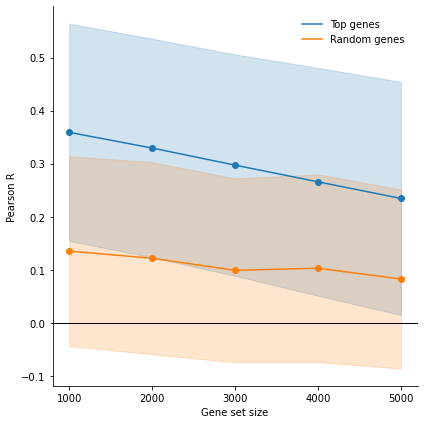

<Figure size 432x288 with 0 Axes>

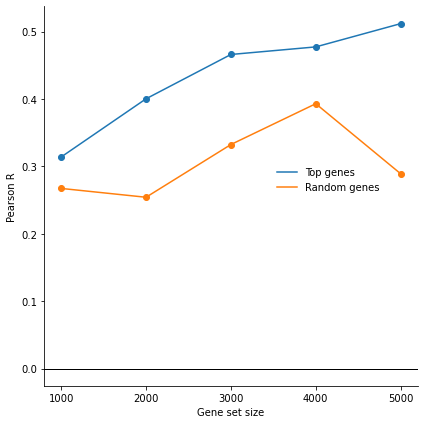

In [17]:
# train gene per gene 
top_base_path ='/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs/'
top_job_ids = [22527202,22527203,22527204,22527205,22527206]
top_epochs = [8,9,6,6,5]
top_paths = []
for i in range(len(top_job_ids)): 
    top_paths.append(f'{top_base_path}{top_job_ids[i]}/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch={top_epochs[i]}.ckpt/')
top_gene_list = np.load(f'{top_paths[0]}gene_list.npy')
top_train, top_val, top_test = SAGEnet.tools.get_train_val_test_genes(top_gene_list)

# get paths (rand) 
rand_base_path ='/data/mostafavilab/personal_genome_expr/da_models/rand_larger_gene_sets_save_all_epochs/'
rand_job_ids = [22528725,22528726,22528727,22528728,22528729]
rand_epochs = [6,9,8,9,6]
rand_paths = []
for i in range(len(rand_job_ids)): 
    rand_paths.append(f'{rand_base_path}{rand_job_ids[i]}/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch={rand_epochs[i]}.ckpt/')
rand_gene_list = np.load(f'{rand_paths[0]}gene_list.npy')
rand_train, rand_val, rand_test = SAGEnet.tools.get_train_val_test_genes(rand_gene_list)

top_gene_res = []
for path in top_paths: 
    top_gene_res.append(pd.read_csv(f'{path}per_gene_pearson_corr.csv',index_col=0).loc[top_train]['pearson'].values)
top_gene_res=np.array(top_gene_res)

rand_gene_res = []
for path in rand_paths: 
    rand_gene_res.append(pd.read_csv(f'{path}per_gene_pearson_corr.csv',index_col=0).loc[rand_train]['pearson'].values)
rand_gene_res=np.array(rand_gene_res)

SAGEnet.plot.line_plot_compare(top_gene_res,rand_gene_res,xlabels=[1000,2000,3000,4000,5000],arra_t='Top genes',arrb_t='Random genes',xlabel='Gene set size',ylabel='Pearson R',fig_width=6,legend_x=.99,legend_y=.99)

top_gene_res = []
obs = gtex_expr_data.loc[top_test].mean(axis=1).values
for i in range(len(top_paths)): 
    path = top_paths[i]
    mean_pred = pd.read_csv(f'{path}mean_predictions.csv',index_col=0).loc[top_test].mean(axis=1).values
    corr, pval = scipy.stats.pearsonr(mean_pred,obs)
    top_gene_res.append(corr)
top_gene_res=np.array(top_gene_res)
    
rand_gene_res = []
obs = gtex_expr_data.loc[rand_test].mean(axis=1).values
for i in range(len(rand_paths)): 
    path = rand_paths[i]
    mean_pred = pd.read_csv(f'{path}mean_predictions.csv',index_col=0).loc[rand_test].mean(axis=1).values
    corr, pval = scipy.stats.pearsonr(mean_pred,obs)
    rand_gene_res.append(corr)
rand_gene_res=np.array(rand_gene_res)

SAGEnet.plot.line_plot_compare(top_gene_res,rand_gene_res,xlabels=[1000,2000,3000,4000,5000],arra_t='Top genes',arrb_t='Random genes',xlabel='Gene set size',ylabel='Pearson R',fig_width=6,legend_x=.6,legend_y=.6)

#### performance on ref seq 

In [20]:
assignments_df = pd.read_csv('/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/input_data/enformer_gene_splits.csv',index_col=0)
enformer_train_genes = assignments_df[assignments_df['enformer_set']=='train'].index
enformer_val_genes = assignments_df[assignments_df['enformer_set']=='valid'].index
enformer_test_genes = assignments_df[assignments_df['enformer_set']=='test'].index

In [21]:
fintuned_ref_pred_df = pd.read_csv('/data/mostafavilab/personal_genome_expr/final_results/enformer/ref_seq_all_tracks/finetuned_ref_pred.csv',index_col=0)
track_specific_ref_pred_df= pd.read_csv('/data/mostafavilab/personal_genome_expr/final_results/enformer/ref_seq_all_tracks/track_specific_ref_pred.csv',index_col=0)

<Figure size 432x288 with 0 Axes>

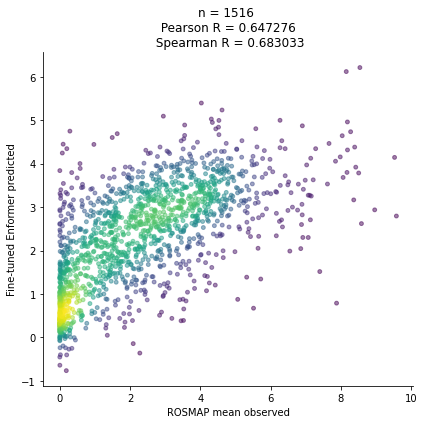

In [22]:
SAGEnet.plot.scatter_compare(rosmap_expr_data.loc[enformer_test_genes].mean(axis=1).values,fintuned_ref_pred_df.loc[enformer_test_genes]['pred'].values,'ROSMAP mean observed','Fine-tuned Enformer predicted')

<Figure size 432x288 with 0 Axes>

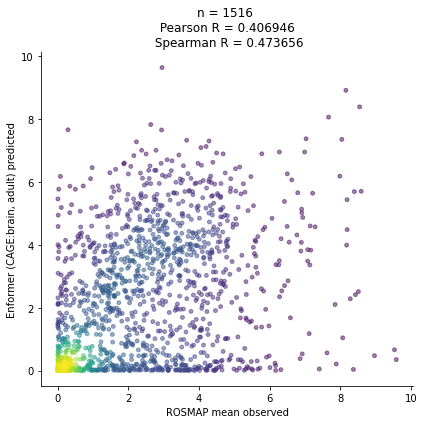

In [23]:
SAGEnet.plot.scatter_compare(rosmap_expr_data.loc[enformer_test_genes].mean(axis=1).values,track_specific_ref_pred_df.loc[enformer_test_genes]['pred'].values,'ROSMAP mean observed','Enformer (CAGE:brain, adult) predicted')

<Figure size 432x288 with 0 Axes>

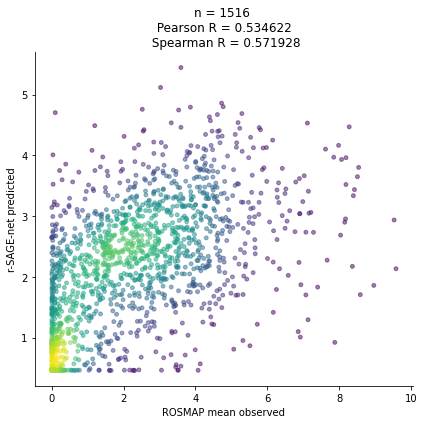

In [28]:
# r-SAGE-net
refcnn_pred_dir = '/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand_enformer_gene_set/job0/metric_train_gene_gene/eval_on_ref_seq/epoch=13-step=35784.ckpt/'
refcnn_gene_list = np.load(f'{refcnn_pred_dir}gene_list.npy')
refcnn_pred = np.load(f'{refcnn_pred_dir}preds.npy')
refcnn_pred_res= pd.DataFrame(index=refcnn_gene_list)
refcnn_pred_res['pred'] = refcnn_pred
SAGEnet.plot.scatter_compare(rosmap_expr_data.loc[enformer_test_genes].mean(axis=1).values,refcnn_pred_res.loc[enformer_test_genes]['pred'].values,'ROSMAP mean observed','r-SAGE-net predicted')

#### model variations

##### ablation 

saving predictions and correlations
/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/


/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/data/mostafavilab/personal_genome_expr/da_models/no_start_from_ref_save_all_epochs_22527758/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/


/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/data/mostafavilab/personal_genome_expr/da_models/not_zscore_save_all_epochs_22527397/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/


/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/data/mostafavilab/personal_genome_expr/da_models/transformer/23290707/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=8.ckpt/


/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/data/mostafavilab/personal_genome_expr/no_expr_split_no_subtract_23941856/personal_model/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=7.ckpt/


/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


988
plotting per gene train gene
/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/
/data/mostafavilab/personal_genome_expr/da_models/no_start_from_ref_save_all_epochs_22527758/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/
/data/mostafavilab/personal_genome_expr/da_models/not_zscore_save_all_epochs_22527397/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/
/data/mostafavilab/personal_genome_expr/da_models/transformer/23290707/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=8.ckpt/
/data/mostafavilab/personal_genome_expr/no_expr_split_no_subtract_23941856/personal_model/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=7.ckpt/
plotting per gene test gene
plotting across gene test gene


/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


<Figure size 432x288 with 0 Axes>

<Figure size 504x432 with 0 Axes>

<Figure size 504x432 with 0 Axes>

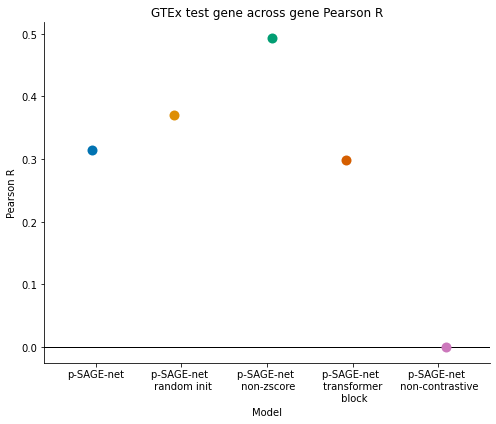

In [5]:
# ablation 
paths = ['/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
        '/data/mostafavilab/personal_genome_expr/da_models/no_start_from_ref_save_all_epochs_22527758/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
         '/data/mostafavilab/personal_genome_expr/da_models/not_zscore_save_all_epochs_22527397/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
         '/data/mostafavilab/personal_genome_expr/da_models/transformer/23290707/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=8.ckpt/',
        '/data/mostafavilab/personal_genome_expr/no_expr_split_no_subtract_23941856/personal_model/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=7.ckpt/'
        ]

labels = ['p-SAGE-net','p-SAGE-net \n random init','p-SAGE-net \n non-zscore','p-SAGE-net \n transformer \n block', 'p-SAGE-net \n non-contrastive']
fig_save_dir = '/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/plot_figures/figs/'
save_boxplots(paths,labels,gtex_expr_data,'ablation',fig_save_dir=fig_save_dir,title='GTEx',fig_width=7)

##### hyperparamter weights 

saving predictions and correlations
/data/mostafavilab/personal_genome_expr/da_models/test_weights_save_all_epochs/22528530/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/


/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/


/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/data/mostafavilab/personal_genome_expr/da_models/test_weights_save_all_epochs/22528533/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/


/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


988
plotting per gene train gene
/data/mostafavilab/personal_genome_expr/da_models/test_weights_save_all_epochs/22528530/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/
/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/
/data/mostafavilab/personal_genome_expr/da_models/test_weights_save_all_epochs/22528533/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/
plotting per gene test gene
plotting across gene test gene


<Figure size 432x288 with 0 Axes>

<Figure size 360x432 with 0 Axes>

<Figure size 360x432 with 0 Axes>

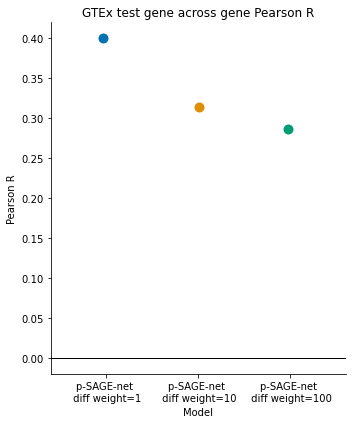

In [6]:
 paths = ['/data/mostafavilab/personal_genome_expr/da_models/test_weights_save_all_epochs/22528530/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
        '/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
         '/data/mostafavilab/personal_genome_expr/da_models/test_weights_save_all_epochs/22528533/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',]
labels = ['p-SAGE-net \n diff weight=1','p-SAGE-net \n diff weight=10','p-SAGE-net \n diff weight=100']
fig_save_dir = '/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/plot_figures/figs/'
save_boxplots(paths,labels,gtex_expr_data,'loss_fn_weights',fig_save_dir=fig_save_dir,title='GTEx',fig_width=5)

##### window size

saving predictions and correlations
/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/


/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/data/mostafavilab/personal_genome_expr/da_models/1k_input_2k_no_rc_fix_err_23149453/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=5.ckpt/


/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


988
plotting per gene train gene
/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/
/data/mostafavilab/personal_genome_expr/da_models/1k_input_2k_no_rc_fix_err_23149453/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=5.ckpt/
plotting per gene test gene
plotting across gene test gene


<Figure size 432x288 with 0 Axes>

<Figure size 288x432 with 0 Axes>

<Figure size 288x432 with 0 Axes>

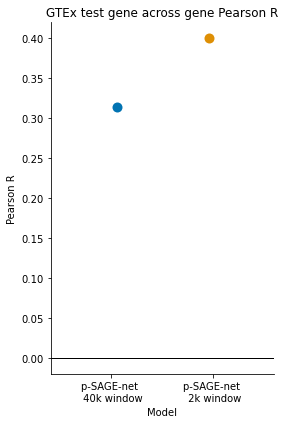

In [7]:
paths = ['/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/',
         '/data/mostafavilab/personal_genome_expr/da_models/1k_input_2k_no_rc_fix_err_23149453/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=5.ckpt/',
         ]

labels = ['p-SAGE-net \n 40k window','p-SAGE-net \n 2k window']
fig_save_dir = '/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/plot_figures/figs/'
save_boxplots(paths,labels,gtex_expr_data,'win_size',fig_save_dir=fig_save_dir,title='GTEx',fig_width=4)

##### increased model size

saving predictions and correlations
/data/mostafavilab/personal_genome_expr/da_models/rand_larger_gene_sets_save_all_epochs/22528727/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/


/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


/data/mostafavilab/personal_genome_expr/med_model_3k_rand_23506873/personal_model/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=6.ckpt/


/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


986
plotting per gene train gene
/data/mostafavilab/personal_genome_expr/da_models/rand_larger_gene_sets_save_all_epochs/22528727/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/
/data/mostafavilab/personal_genome_expr/med_model_3k_rand_23506873/personal_model/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=6.ckpt/
plotting per gene test gene
plotting across gene test gene


<Figure size 432x288 with 0 Axes>

<Figure size 288x432 with 0 Axes>

<Figure size 288x432 with 0 Axes>

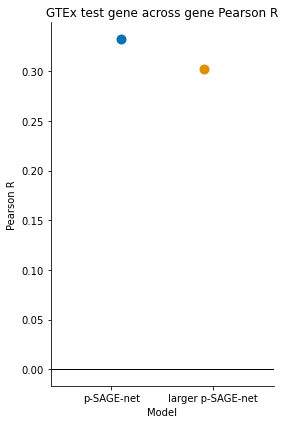

In [10]:
smaller_model_path = '/data/mostafavilab/personal_genome_expr/da_models/rand_larger_gene_sets_save_all_epochs/22528727/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/'
larger_model_path = '/data/mostafavilab/personal_genome_expr/med_model_3k_rand_23506873/personal_model/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=6.ckpt/'
fig_save_dir = '/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/plot_figures/figs/'
gene_set = np.load('/data/mostafavilab/personal_genome_expr/da_models/rand_larger_gene_sets_save_all_epochs/22528725/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=6.ckpt/gene_list.npy')
fig_save_dir = '/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/plot_figures/figs/'
save_boxplots([smaller_model_path,larger_model_path],['p-SAGE-net', 'larger p-SAGE-net'],gtex_expr_data,'larger_model',fig_save_dir=fig_save_dir,title='GTEx',xlabel='Model',fig_width=4,gene_set=gene_set)

##### rc vs. non

/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/homes/gws/aspiro17/miniconda3/envs/plot/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


selecting train/val/test gene sets based on chromosome split
/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=22.ckpt/
/data/mostafavilab/personal_genome_expr/da_models/1k_with_rc_22962405/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=17.ckpt/


<Figure size 432x288 with 0 Axes>

<Figure size 288x432 with 0 Axes>

<Figure size 288x432 with 0 Axes>

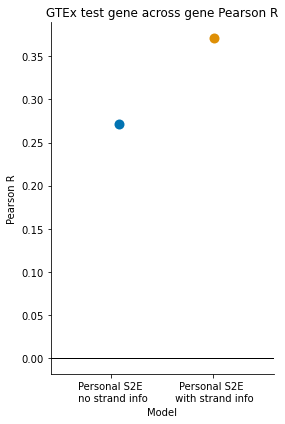

In [7]:
paths = ['/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=22.ckpt/',
         '/data/mostafavilab/personal_genome_expr/da_models/1k_with_rc_22962405/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=17.ckpt/']

labels = ['Personal S2E \n no strand info','Personal S2E \n with strand info']
fig_save_dir = '/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/plot_figures/figs/'
save_boxplots(paths,labels,gtex_expr_data,'strand_info',fig_save_dir=fig_save_dir,title='GTEx',fig_width=4,gene_set=top_1000_gene_set)

#### ENSG00000134202 performance

In [15]:
gene_of_interest = 'ENSG00000134202'
personal_model_diff_predictions = pd.read_csv('/data/mostafavilab/personal_genome_expr/da_models/larger_gene_sets_save_all_epochs_22527202/metric_train_gene_gene/eval_on_individual/gtex/test_subs/epoch=8.ckpt/diff_predictions.csv',index_col=0)
ref_model_predictions = pd.read_csv('/data/mostafavilab/personal_genome_expr/ref_cnn_models/rc_neg_strand/job0/metric_train_gene_gene/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/epoch=12-step=32045.ckpt/predictions.csv',index_col=0)
enformer_pred = pd.read_csv('/data/mostafavilab/personal_genome_expr/final_results/enformer/finetuned_example/eval_on_individual/snps_and_indels/no_maf_filter/gtex/test_subs/predictions.csv',index_col=0)

<Figure size 432x288 with 0 Axes>

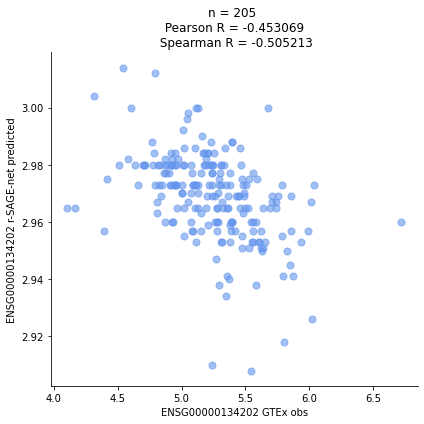

In [13]:
SAGEnet.plot.scatter_compare(gtex_expr_data.loc[gene_of_interest,gtex_expr_data.columns],ref_model_predictions.loc[gene_of_interest,gtex_expr_data.columns],plot_density=False,
                                arra_t=f'{gene_of_interest} GTEx obs',arrb_t=f'{gene_of_interest} r-SAGE-net predicted')

<Figure size 432x288 with 0 Axes>

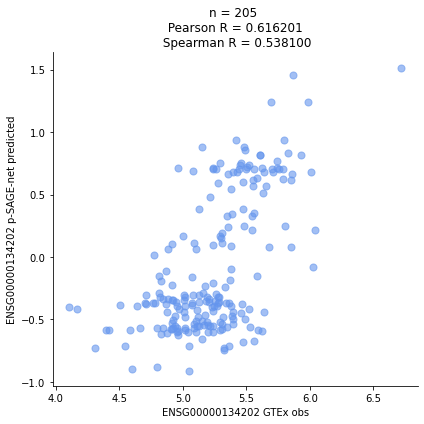

In [14]:
SAGEnet.plot.scatter_compare(gtex_expr_data.loc[gene_of_interest,gtex_expr_data.columns],personal_model_diff_predictions.loc[gene_of_interest,gtex_expr_data.columns],plot_density=False,
                                arra_t=f'{gene_of_interest} GTEx obs',arrb_t=f'{gene_of_interest} p-SAGE-net predicted')

<Figure size 432x288 with 0 Axes>

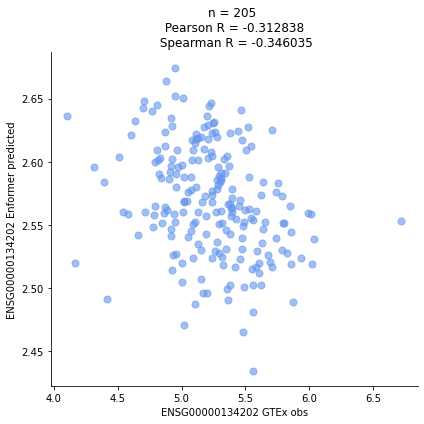

In [16]:
SAGEnet.plot.scatter_compare(gtex_expr_data.loc[gene_of_interest,gtex_expr_data.columns],enformer_pred.loc[gene_of_interest,gtex_expr_data.columns],plot_density=False,
                                arra_t=f'{gene_of_interest} GTEx obs',arrb_t=f'{gene_of_interest} Enformer predicted')